### 全國電影票房統計 累計銷售金額與累計銷售票數之關係
來源 https://data.gov.tw/dataset/94224

In [71]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import locale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

locale.setlocale(locale.LC_NUMERIC, '')
mpl.font_manager._rebuild()
mpl.rc('font', family='Noto Sans CJK TC')

In [72]:
df=pd.read_csv('https://opendata.culture.tw/upload/dataSource/2019-03-21/6eebfdc2-bb2f-4c8c-bd01-90bfbe65c42c/36b480389779619a577a8cb1ac873b94.csv')
df['銷售金額']=df['銷售金額'].apply(locale.atof)
df['累計銷售票數']=df['累計銷售票數'].apply(locale.atof)
df['累計銷售金額']=df['累計銷售金額'].apply(locale.atof)
df.head()

,序號,國別地區,中文片名,上映日期,申請人,出品,上映日數,上映院數,銷售票數,周票數變動率,銷售金額,累計銷售票數,累計銷售金額
0,1,日本,Fate/stay night：II.迷途之蝶,2019/03/09,曼迪傳播有限公司,Aniplex Inc.,5,17,"26,822","9,023.13%",6700357.0,27116.0,6770917.0
1,2,泰國,限時好友,2019/03/08,威視股份有限公司,GDH 599 COMPANY LIMITED,7,60,"20,130",19.49%,4619406.0,43392.0,10020838.0
2,3,香港,滾滾紅塵(數位修復版),2019/03/08,能率影業股份有限公司,湯臣(香港)電影有限公司,7,24,"5,541",1.76%,1209297.0,10986.0,2432066.0
3,4,中華民國,乳‧房,2019/03/08,可樂藝術文創股份有限公司,吳美良##謝志文##廖琬玲##廖千秀,7,22,"2,042",-23.83%,452964.0,4835.0,1076718.0
4,5,美國,RBG：不恐龍大法官,2019/03/08,亮點國際影業有限公司,Magnolia Pictures LLC,7,12,"1,805",25.52%,385355.0,3310.0,707988.0


In [73]:
Y=df.累計銷售金額
X=df.累計銷售票數

In [74]:
X.head()

0    27116.0
1    43392.0
2    10986.0
3     4835.0
4     3310.0
Name: 累計銷售票數, dtype: float64

In [75]:
Y.head()

0     6770917.0
1    10020838.0
2     2432066.0
3     1076718.0
4      707988.0
Name: 累計銷售金額, dtype: float64

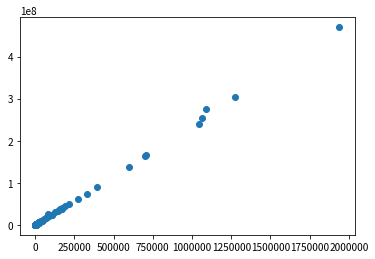

In [76]:
plt.scatter(X,Y)

In [77]:
regr = LinearRegression()

In [78]:
x=np.array(X)
x = x.reshape(len(x), 1)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state = 666)

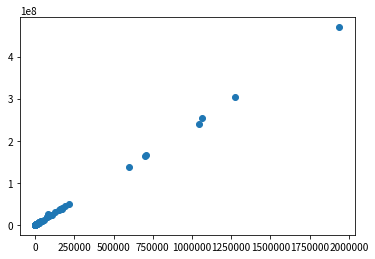

In [80]:
plt.scatter(x_train, y_train)

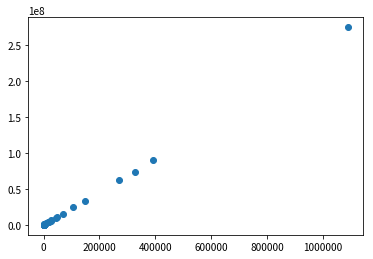

In [81]:
plt.scatter(x_test, y_test) 

In [82]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
Y_pred = regr.predict(x_test)

Text(0,0.5,'累計銷售金額')

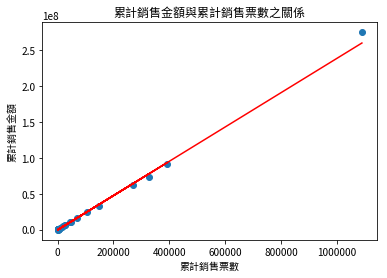

In [84]:
plt.scatter(x_test, y_test)
plt.plot(x_test, Y_pred, 'r')
plt.title('累計銷售金額與累計銷售票數之關係')
plt.xlabel('累計銷售票數')
plt.ylabel('累計銷售金額')